## Нахождение оптимальных признаков для обучения с момощью L1-регуляризатора

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.linear_model import Lasso  # L1-регуляризатор
import matplotlib.pyplot as plt

In [ ]:
data = load_breast_cancer(as_frame=True)

In [ ]:
df = pd.concat([data.data, data.target], axis=1)

In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
def l1_models(X, y, l1=tuple(2 ** np.linspace(-10, 10, 100)), scale=False, early_stopping=False, **kwargs):
    """Линейные модели с разной L1-регуляризацией"""
    assert isinstance(X, (list, tuple, type(np.array), pd.DataFrame)), \
        f'Incorrect dtype. X: {type(X)} instead of {(list, tuple, type(np.array), pd.DataFrame)}'
    assert isinstance(y, (list, tuple, type(np.array), pd.Series, pd.DataFrame)), \
        f'Incorrect dtype. y: {type(y)} instead of {(list, tuple, type(np.array), pd.Series, pd.DataFrame)}'
    assert isinstance(l1,  (list, tuple, type(np.array)))
    assert isinstance(scale, bool), f'Incorrect dtype. scale: {type(scale)} instead of {bool}'
    assert isinstance(early_stopping, bool), f'Incorrect dtype. early_stopping: {type(early_stopping)} instead of {bool}'

    X = StandardScaler().fit_transform(X) if scale else X

    result = list()
    for alpha in tqdm(l1, desc='Fitting L1-models'):
        model = Lasso(alpha=alpha).fit(X, y)
        result.append(model)
        if early_stopping and all(map(lambda c: c == 0, model.coef_)): break  # если все признаки обнулятся
    return result

In [ ]:
l1_models(df.drop(['target'], axis=1), df['target'], scale=True, early_stopping=True)

Fitting L1-models:  43%|████▎     | 43/100 [00:00<00:00, 914.89it/s]


[Lasso(alpha=0.0009765625),
 Lasso(alpha=0.0011233476571973669),
 Lasso(alpha=0.0012921957979451526),
 Lasso(alpha=0.0014864231651962546),
 Lasso(alpha=0.001709844459752558),
 Lasso(alpha=0.001966847762467772),
 Lasso(alpha=0.0022624807178568238),
 Lasso(alpha=0.0026025496717912854),
 Lasso(alpha=0.0029937337103836327),
 Lasso(alpha=0.0034437158398282082),
 Lasso(alpha=0.003961333883621868),
 Lasso(alpha=0.004556754060844206),
 Lasso(alpha=0.005241670654642098),
 Lasso(alpha=0.006029535692485006),
 Lasso(alpha=0.006935823149200318),
 Lasso(alpha=0.007978332861838782),
 Lasso(alpha=0.00917754012537585),
 Lasso(alpha=0.01055699783544401),
 Lasso(alpha=0.01214379907633531),
 Lasso(alpha=0.013969109239681853),
 Lasso(alpha=0.01606877812483144),
 Lasso(alpha=0.01848404404280697),
 Lasso(alpha=0.021262343752724643),
 Lasso(alpha=0.024458244138135844),
 Lasso(alpha=0.0281345139217778),
 Lasso(alpha=0.03236335646762575),
 Lasso(alpha=0.037227827882957455),
 Lasso(alpha=0.042823468272503856),
 

In [ ]:
def l1_importance(X, y, l1=tuple(2 ** np.linspace(-10, 10, 100)), scale=False, early_stopping=False, **kwargs):
    """Коэффициенты признаков линейной модели с L1-регуляризацией"""
    assert isinstance(X, (list, tuple, type(np.array), pd.DataFrame)), \
        f'Incorrect dtype. X: {type(X)} instead of {(list, tuple, type(np.array), pd.DataFrame)}'
    assert isinstance(y, (list, tuple, type(np.array), pd.Series, pd.DataFrame)), \
        f'Incorrect dtype. y: {type(y)} instead of {(list, tuple, type(np.array), pd.Series, pd.DataFrame)}'
    assert isinstance(l1,  (list, tuple, type(np.array)))
    assert isinstance(scale, bool), f'Incorrect dtype. scale: {type(scale)} instead of {bool}'
    assert isinstance(early_stopping, bool), f'Incorrect dtype. early_stopping: {type(early_stopping)} instead of {bool}'
    
    l1_models_ = l1_models(X, y, l1=l1, scale=scale, early_stopping=early_stopping)

    df = pd.DataFrame([l1_model.coef_ for l1_model in l1_models_], columns=X.columns)
    return pd.concat([pd.DataFrame({'L1': l1}), df], axis=1)

In [ ]:
l1_importance(df.drop(['target'], axis=1), df['target'], scale=True, early_stopping=True).head(10)

Fitting L1-models:  43%|████▎     | 43/100 [00:00<00:00, 848.13it/s]


,L1,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.000977,-0.000000,-0.020238,-0.0,0.006326,0.0,0.151323,-0.080472,-0.082462,0.0,...,-0.485102,-0.044976,-0.0,0.304899,-0.019495,0.0,-0.080017,-0.058195,-0.044848,-0.069536
1,0.001123,-0.000000,-0.020724,-0.0,0.000000,0.0,0.144204,-0.072111,-0.083066,0.0,...,-0.461688,-0.044224,-0.0,0.288162,-0.019774,0.0,-0.081065,-0.061025,-0.045656,-0.067536
2,0.001292,-0.000000,-0.021728,-0.0,0.000000,0.0,0.136294,-0.063053,-0.085860,0.0,...,-0.441512,-0.042752,-0.0,0.269851,-0.019693,0.0,-0.081869,-0.063534,-0.046195,-0.065361
3,0.001486,-0.000000,-0.021834,-0.0,0.000000,0.0,0.127188,-0.052621,-0.089769,0.0,...,-0.417605,-0.042878,-0.0,0.248484,-0.019382,0.0,-0.082911,-0.065775,-0.046367,-0.062775
4,0.001710,-0.000000,-0.021964,-0.0,0.000000,0.0,0.117362,-0.041091,-0.094441,0.0,...,-0.390760,-0.042986,-0.0,0.224165,-0.018936,0.0,-0.083058,-0.068212,-0.046409,-0.060764
5,0.001967,-0.000000,-0.022119,-0.0,0.000000,0.0,0.106554,-0.028203,-0.099929,0.0,...,-0.360421,-0.043081,-0.0,0.196427,-0.018350,0.0,-0.082426,-0.070919,-0.046339,-0.059180
6,0.002262,-0.000000,-0.022300,-0.0,0.000000,-0.0,0.094137,-0.013404,-0.106227,0.0,...,-0.325520,-0.043189,-0.0,0.164515,-0.017680,0.0,-0.081694,-0.074035,-0.046260,-0.057356
7,0.002603,-0.004153,-0.022312,-0.0,0.000000,-0.0,0.080439,-0.000000,-0.109767,0.0,...,-0.279163,-0.043518,-0.0,0.124891,-0.017363,0.0,-0.079582,-0.078834,-0.046347,-0.055469
8,0.002994,-0.017116,-0.021832,-0.0,0.000000,-0.0,0.067190,-0.000000,-0.100379,0.0,...,-0.214505,-0.044253,-0.0,0.073352,-0.018603,0.0,-0.071675,-0.088573,-0.046059,-0.054382
9,0.003444,-0.032454,-0.021327,-0.0,0.000000,-0.0,0.052145,-0.000000,-0.089161,0.0,...,-0.140025,-0.045056,-0.0,0.014261,-0.019985,0.0,-0.062628,-0.100298,-0.045731,-0.052951


In [ ]:
def l1_importance_plot(x, y, l1=tuple(2 ** np.linspace(-10, 10, 100)), scale=False, early_stopping=False, **kwargs):
    """Построение коэффициентов (весов) признаков линейных моделей с L1-регуляризацией"""
    assert isinstance(x, (list, tuple, type(np.array), pd.DataFrame)), \
        f'Incorrect dtype. X: {type(x)} instead of {(list, tuple, type(np.array), pd.DataFrame)}'
    assert isinstance(y, (list, tuple, type(np.array), pd.Series, pd.DataFrame)), \
        f'Incorrect dtype. y: {type(y)} instead of {(list, tuple, type(np.array), pd.Series, pd.DataFrame)}'
    assert isinstance(l1,  (list, tuple, type(np.array)))
    assert isinstance(scale, bool), f'Incorrect dtype. scale: {type(scale)} instead of {bool}'
    assert isinstance(early_stopping, bool), f'Incorrect dtype. early_stopping: {type(early_stopping)} instead of {bool}'
    

    df = l1_importance(x,y,l1=l1, scale=scale, early_stopping=early_stopping)
    df.dropna(axis=0, inplace=True)
    x = df.pop('L1')

    plt.figure(figsize=kwargs.get('figsize', (12, 9)))
    plt.grid(kwargs.get('grid', True))
    for column in df.columns:
        plt.plot(x, df[column])
    plt.legend(df.columns, fontsize=12)
    plt.xlabel('L1', fontsize=14)
    plt.ylabel('coef', fontsize=14)
    plt.xlim([0, l1[x.shape[0]]])
    plt.show()

Fitting L1-models:  43%|████▎     | 43/100 [00:00<00:00, 858.30it/s]


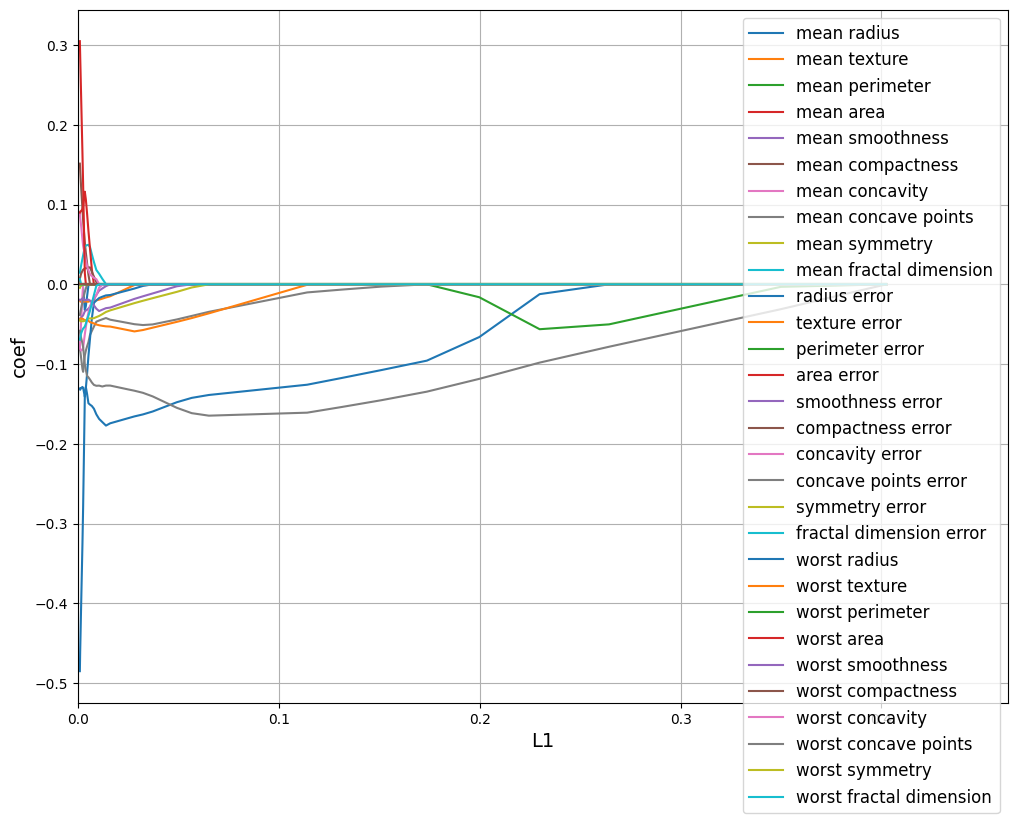

In [ ]:
l1_importance_plot(df.drop(['target'], axis=1), df['target'], scale=True, early_stopping=True)

In [ ]:
def l1_best_features(x, y, l1_threshold, min_coef, l1=tuple(2 ** np.linspace(-10, 10, 100)), scale=False, early_stopping=False, **kwargs):
    """
    Finds the best features to train the model based on L1 opinion.

    Parameters:
    x (list, tuple, np.array, pd.DataFrame): The input data.
    y (list, tuple, np.array, pd.Series, pd.DataFrame): The target data.
    l1_threshold (float): The threshold value for L1 regularization.
    min_coef (float): The minimum coefficient value for feature selection.
    l1 (list, tuple, np.array): The L1 regularization strengths. Defaults to a tuple of 100 values ranging from 2^(-10) to 2^10.
    scale (bool): A flag to indicate whether to scale the data. Defaults to False.
    early_stopping (bool): A flag to indicate whether to use early stopping. Defaults to False.
    **kwargs: Additional keyword arguments to pass to the l1_importance function.

    Returns:
    pd.Series: A Series containing the selected features with coefficients greater than min_coef at the optimal L1 regularization strength.
    """
    assert isinstance(x, (list, tuple, type(np.array), pd.DataFrame)), \
        f'Incorrect dtype. X: {type(x)} instead of {(list, tuple, type(np.array), pd.DataFrame)}'
    assert isinstance(y, (list, tuple, type(np.array), pd.Series, pd.DataFrame)), \
        f'Incorrect dtype. y: {type(y)} instead of {(list, tuple, type(np.array), pd.Series, pd.DataFrame)}'
    assert isinstance(l1,  (list, tuple, type(np.array)))
    assert isinstance(scale, bool), f'Incorrect dtype. scale: {type(scale)} instead of {bool}'
    assert isinstance(early_stopping, bool), f'Incorrect dtype. early_stopping: {type(early_stopping)} instead of {bool}'
    

    df = l1_importance(x,y,l1=l1, scale=scale, early_stopping=early_stopping)
    l1_place = df['L1'].to_list().index(df['L1'][min(range(len(df['L1'])), key = lambda i: abs(df['L1'][i]-l1_threshold))])
    res = df.iloc[l1_place, 1:]
    res = res[abs(res) > min_coef]
    return res

In [ ]:
useful_features = l1_best_features(df.drop(['target'], axis=1), df['target'], 0.1, 10**-5, scale=True, early_stopping=True)

Fitting L1-models:  43%|████▎     | 43/100 [00:00<00:00, 853.26it/s]


In [ ]:
new_df = df[useful_features.index]
new_df

,mean concave points,worst radius,worst texture,worst concave points
0,0.14710,25.380,17.33,0.2654
1,0.07017,24.990,23.41,0.1860
2,0.12790,23.570,25.53,0.2430
3,0.10520,14.910,26.50,0.2575
4,0.10430,22.540,16.67,0.1625
...,...,...,...,...
564,0.13890,25.450,26.40,0.2216
565,0.09791,23.690,38.25,0.1628
566,0.05302,18.980,34.12,0.1418
567,0.15200,25.740,39.42,0.2650


## Корреляция признаков

In [ ]:
def corr_features(df: pd.DataFrame, threshold: int | float = 0.85, **kwargs) -> dict:
    """Finds the correlated features more than the threshold and returns like dict"""
    assert isinstance(df, pd.DataFrame), f'Incorrect dtype. df: {type(df)} instead of {pd.DataFrame}'
    assert isinstance(threshold,
                      (int, float)), f'Incorrect dtype. threshold: {type(threshold)} instead of any {(int, float)}'
    assert 0 < threshold <= 1, 'Incorrect threshold value. It must be (0, 1]'

    method = kwargs.get('method', 'pearson').lower()
    corr_matrix = df.corr(method=method).abs()
    upper_tri = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    corr_features = corr_matrix.where(upper_tri).unstack()

    return corr_features[corr_features > threshold].to_dict()

In [ ]:
corr_features(df, 0.85)

{('mean perimeter', 'mean radius'): 0.9978552814938109,
 ('mean area', 'mean radius'): 0.9873571700566127,
 ('mean area', 'mean perimeter'): 0.9865068039913907,
 ('mean concavity', 'mean compactness'): 0.8831206701772507,
 ('mean concave points', 'mean perimeter'): 0.8509770412528191,
 ('mean concave points', 'mean concavity'): 0.9213910263788588,
 ('perimeter error', 'radius error'): 0.9727936770160764,
 ('area error', 'radius error'): 0.951830112110991,
 ('area error', 'perimeter error'): 0.9376554069544157,
 ('worst radius', 'mean radius'): 0.9695389726112055,
 ('worst radius', 'mean perimeter'): 0.9694763634663146,
 ('worst radius', 'mean area'): 0.9627460860470841,
 ('worst texture', 'mean texture'): 0.912044588840421,
 ('worst perimeter', 'mean radius'): 0.9651365139559871,
 ('worst perimeter', 'mean perimeter'): 0.9703868870426394,
 ('worst perimeter', 'mean area'): 0.9591195743552645,
 ('worst perimeter', 'mean concave points'): 0.8559231281343119,
 ('worst perimeter', 'worst r